# National Audit Office Data Scientist Internship challenge

[Github repo](https://github.com/AshishKakran/nao-internship-challenge)

[data source](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom)

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import sys
assert sys.version_info >= (3, 7)

In [4]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


In [5]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_theme(style='ticks')

In [6]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Data Preprocessing

In [7]:
try:
    xfile = pd.ExcelFile('atmosphericemissionsghg.xlsx')
except FileNotFoundError:
    print("Please make sure you have downloaded the file given in link in current directory")

In [8]:
xfile.sheet_names

['Contents', 'GHG total', 'CO2', 'CH4', 'N2O', 'HFC', 'PFC', 'NF3', 'SF6']

In [9]:
def preprocess(xlfile, sheet, mode):
    
    cols = [i for i in range(1990,2021)]
    cols.insert(0,'group')
    cols.insert(1,'name')
    raw_data = pd.read_excel(xlfile, sheet)
    
    if mode =='r':
        extract = raw_data.iloc[3:24].copy()
        extract.drop(extract.columns[1],axis = 1, inplace = True)
    elif mode =='s':
        extract = raw_data.iloc[29:160].copy()
        extract.drop(extract.columns[0],axis = 1, inplace = True)
    else:
        raise ValueError('mode not found')
    
    extract.columns = pd.Index(cols)
    extract.reset_index(drop=True, inplace = True)
    
    return extract


In [10]:
def process_data(xlfile,mode):
    frames = {}
    for sheet in xlfile.sheet_names[1:]:
        frames[sheet] = preprocess(xfile,sheet,mode)
        
    return frames



In [11]:
res_frames = {}
sic_frames = {}
res_frames = process_data(xfile,'r')
sic_frames = process_data(xfile,'s')

In [12]:
ghg = res_frames['GHG total']
ghg.head()

,group,name,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,"Agriculture, forestry and fishing",55231.9,54984.4,54543.9,53737.9,54940.7,54770.8,55696.1,54825.4,...,46788.9,46521.4,46318.8,48209.8,48144.5,48312.1,48947.5,48416.8,48574.6,46843.2
1,B,Mining and quarrying,48693.8,48707.1,49331.3,49142.4,43788.7,45511.6,45808.9,44970.7,...,23694.3,21941.5,20645.0,20581.5,21937.7,20897.1,20901.9,20698.8,20436.8,18620.3
2,C,Manufacturing,180563.3,181614.5,174343.2,168704.3,171407.7,169367.2,170747.2,169529.7,...,93409.9,89820.1,92374.4,91889.4,89109.4,84379.1,85540.0,84643.4,82996.7,80438.6
3,D,"Electricity, gas, steam and air conditioning s...",216597.7,213315.8,201452.1,183993.2,179741.9,177199.8,177054.6,163758.4,...,163204.4,177660.1,168696.9,147556.8,131352.2,109655.1,99384.8,95162.1,89421.3,80770.4
4,E,"Water supply; sewerage, waste management and r...",67701.1,69200.7,69402.1,69615.1,69851.2,70768.0,71303.9,70177.9,...,30447.3,29329.2,26867.1,25192.8,25056.5,25074.2,26032.8,26177.1,26009.3,24857.2


In [13]:
temp = ghg[range(1990,2020)].divide(1000) # conversion of emissions from metric ton to megaton
ghg = temp.join(ghg['name'])

In [14]:
ghg.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,name
0,55.2319,54.9844,54.5439,53.7379,54.9407,54.7708,55.6961,54.8254,54.8088,54.7030,...,46.7889,46.5214,46.3188,48.2098,48.1445,48.3121,48.9475,48.4168,48.5746,"Agriculture, forestry and fishing"
1,48.6938,48.7071,49.3313,49.1424,43.7887,45.5116,45.8089,44.9707,43.7863,40.1402,...,23.6943,21.9415,20.6450,20.5815,21.9377,20.8971,20.9019,20.6988,20.4368,Mining and quarrying
2,180.5633,181.6145,174.3432,168.7043,171.4077,169.3672,170.7472,169.5297,160.5361,144.2880,...,93.4099,89.8201,92.3744,91.8894,89.1094,84.3791,85.5400,84.6434,82.9967,Manufacturing
3,216.5977,213.3158,201.4521,183.9932,179.7419,177.1998,177.0546,163.7584,169.9821,162.4766,...,163.2044,177.6601,168.6969,147.5568,131.3522,109.6551,99.3848,95.1621,89.4213,"Electricity, gas, steam and air conditioning s..."
4,67.7011,69.2007,69.4021,69.6151,69.8512,70.7680,71.3039,70.1779,71.2063,66.8366,...,30.4473,29.3292,26.8671,25.1928,25.0565,25.0742,26.0328,26.1771,26.0093,"Water supply; sewerage, waste management and r..."


In [15]:
True in ghg.isnull().any() # no null values, data is clean

False

In [16]:
# shorten some of the longer group names
pd.options.mode.chained_assignment = None 
ghg['name'][19] = 'Activities of households as employers'
ghg['name'][4] = 'Water supply'
ghg['name'][14] = 'public administration'
ghg['name'][6] = 'Wholesale and retail trade'

## Data Exploration

 How  annual GHG emissions over the years look like?

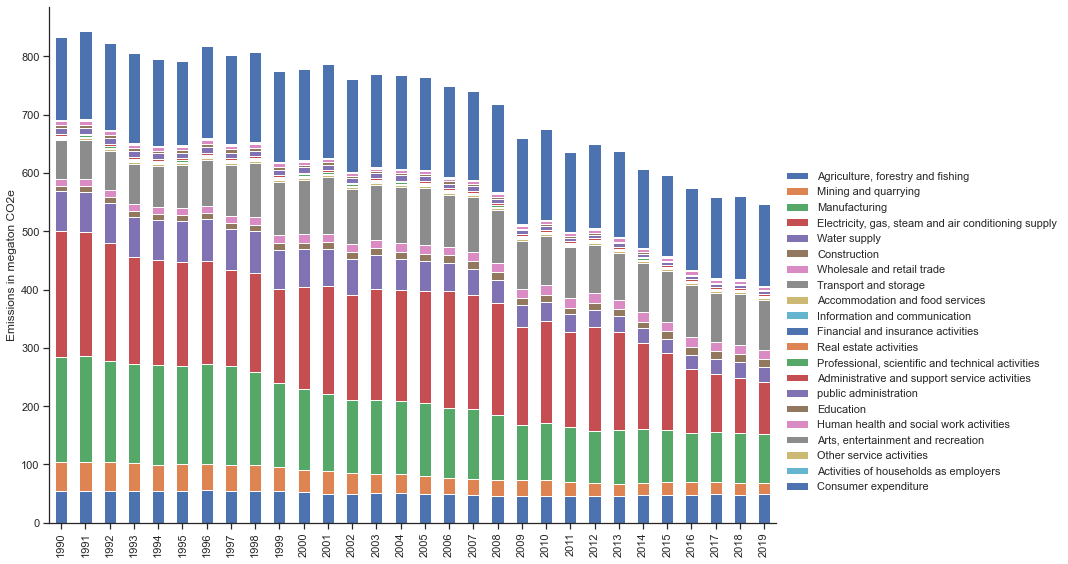

In [17]:
#sns.set()
#ghg.drop('group',axis=1,inplace=True)
fig, ax = plt.subplots(figsize=(15, 8))
ghg.set_index('name').T.plot(ax=ax, kind='bar', stacked=True,  )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, .7), frameon=False, title=None, )
#plt.title(' Annual GHG emissions on residential basis in UK (1990 - 2020)')
plt.ylabel('Emissions in megaton CO2e', )
sns.despine()
save_fig("Annual Emissions")

In [18]:
ghg_series = res_frames['GHG total'][range(1990,2020)].sum()/1000

In [19]:
ghg_series.head()

1990    833.3547
1991    842.9501
1992    823.4133
1993    805.4645
1994      795.85
dtype: object

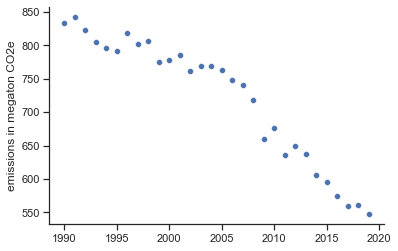

In [20]:
sns.scatterplot(y=ghg_series.values, x = ghg_series.index)
plt.ylabel('emissions in megaton CO2e')
#plt.title('Annual ghg emissions ')
sns.despine()
plt.show()

## Data preparation

GHG value of current year will be used to predict value for next year

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data = pd.DataFrame(ghg_series.values, index=ghg_series.index, columns=['cur'], dtype='float64')

In [23]:
data['next'] = data['cur'].shift(-1)

In [24]:
data['baseline'] = data['cur']

In [25]:
data.tail()

,cur,next,baseline
2015,595.6894,574.5390,595.6894
2016,574.5390,559.0622,574.5390
2017,559.0622,560.2953,559.0622
2018,560.2953,546.7798,560.2953
2019,546.7798,NaN,546.7798


In [26]:
data.interpolate(method='linear', axis = 1, inplace=True)

In [27]:
data.tail()

,cur,next,baseline
2015,595.6894,574.5390,595.6894
2016,574.5390,559.0622,574.5390
2017,559.0622,560.2953,559.0622
2018,560.2953,546.7798,560.2953
2019,546.7798,546.7798,546.7798


In [28]:
train_set,test_set = train_test_split(data,random_state=42,test_size=0.2, shuffle=False) # turned shuffling off due to time series model

In [29]:
train_x = train_set['cur'].values.reshape(-1,1)
train_y = train_set['next'].values.reshape(-1,1)
test_x = test_set['cur'].values.reshape(-1,1)
test_y = test_set['next'].values.reshape(-1,1)

## Training and Model selection

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [32]:
ln_reg.predict(test_x)

array([[591.44624994],
       [580.64142215],
       [558.76344315],
       [542.7542374 ],
       [544.02975634],
       [530.04931979]])

In [33]:
test_set['lr_pred'] = ln_reg.predict(test_x)
test_set

,cur,next,baseline,lr_pred
2014,606.1349,595.6894,606.1349,591.446250
2015,595.6894,574.5390,595.6894,580.641422
2016,574.5390,559.0622,574.5390,558.763443
2017,559.0622,560.2953,559.0622,542.754237
2018,560.2953,546.7798,560.2953,544.029756
2019,546.7798,546.7798,546.7798,530.049320


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X=train_x, y=train_y)

DecisionTreeRegressor(random_state=42)

In [36]:
test_set['dt_pred'] = dt_reg.predict(test_x)
test_set

,cur,next,baseline,lr_pred,dt_pred
2014,606.1349,595.6894,606.1349,591.446250,650.0283
2015,595.6894,574.5390,595.6894,580.641422,650.0283
2016,574.5390,559.0622,574.5390,558.763443,650.0283
2017,559.0622,560.2953,559.0622,542.754237,650.0283
2018,560.2953,546.7798,560.2953,544.029756,650.0283
2019,546.7798,546.7798,546.7798,530.049320,650.0283


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(train_x, y=train_y.ravel())

GradientBoostingRegressor(random_state=42)

In [39]:
test_set['gbr_pred'] = gbr.predict(test_x)
test_set

,cur,next,baseline,lr_pred,dt_pred,gbr_pred
2014,606.1349,595.6894,606.1349,591.446250,650.0283,649.499683
2015,595.6894,574.5390,595.6894,580.641422,650.0283,649.499683
2016,574.5390,559.0622,574.5390,558.763443,650.0283,649.499683
2017,559.0622,560.2953,559.0622,542.754237,650.0283,649.499683
2018,560.2953,546.7798,560.2953,544.029756,650.0283,649.499683
2019,546.7798,546.7798,546.7798,530.049320,650.0283,649.499683


## Model Evaluation and Selection using MAPE scores

In [40]:
def mape(true_y, pred_y):
    return round(np.mean(np.abs((true_y - pred_y)/true_y)) * 100, 2)

In [41]:
pred_curve1 = ln_reg.predict(data.cur.values.reshape(-1,1))
pred_curve2 = dt_reg.predict(data.cur.values.reshape(-1,1))
pred_curve3 = gbr.predict(data.cur.values.reshape(-1,1))

In [42]:
baseline_mape = mape(test_set['next'], test_set['baseline'])
dt_mape = mape(test_set['next'], test_set['dt_pred'])
gbr_mape = mape(test_set['next'], test_set['gbr_pred'])
lr_mape  = mape(test_set['next'], test_set['lr_pred'])

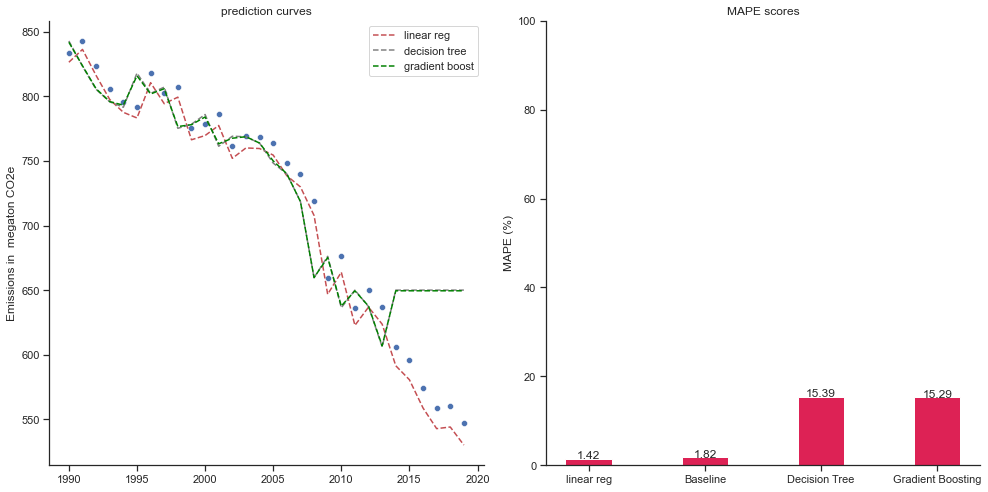

In [60]:
# Generate bar plot
fig, ax = plt.subplots(1,2, figsize=(14, 7))
x = ['linear reg', 'Baseline', 'Decision Tree', 'Gradient Boosting', ]
y = [lr_mape, baseline_mape, dt_mape, gbr_mape ]
ax[1].bar(x, y, width=0.4,color='#DD2255')

ax[1].set_ylabel('MAPE (%)')
ax[1].set_ylim(0, 100.0)
ax[1].set_title('MAPE scores')
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center', )

sns.scatterplot(ax=ax[0], y=ghg_series.values, x = ghg_series.index)
sns.lineplot(ax=ax[0],y=pred_curve1.ravel(), x = ghg_series.index, markers = True, linestyle='--', color='r', label='linear reg' )
sns.lineplot(ax=ax[0],y=pred_curve2.ravel(), x = ghg_series.index, markers = True, linestyle='--', color='grey', label='decision tree')
sns.lineplot(ax=ax[0],y=pred_curve3.ravel(), x = ghg_series.index, markers = True, linestyle='--', color='green', label='gradient boost')
ax[0].set_ylabel('Emissions in  megaton CO2e')
#ax[0].set_yticks([x for x in range(0,1000,100)], )
ax[0].set_title('prediction curves')
ax[0].legend()
sns.despine()
save_fig("model comparison")

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(test_set['next'], test_set['lr_pred']) # best model 

0.6275111516128189

In [46]:
r2_score(test_set['next'], test_set['baseline'])

0.43873118758862073

In [47]:
r2_score(test_set['next'], test_set['dt_pred'])

-25.511783908265897

In [48]:
r2_score(test_set['next'], test_set['gbr_pred'])

-25.199738015657797

## Forecasting

In [51]:
data['lr_pred'] = pred_curve1

In [52]:
forecast = data.drop(['next', 'baseline'], axis=1)

In [53]:
forecast.loc[2019].cur

546.7797999999999

In [54]:
idx = pd.Index(range(1990,2027))

In [55]:
forecast = forecast.reindex(idx )

In [56]:
forecast.tail()

,cur,lr_pred
2022,NaN,NaN
2023,NaN,NaN
2024,NaN,NaN
2025,NaN,NaN
2026,NaN,NaN


In [57]:
for i in range(2020, 2027):
    forecast.loc[i].cur = forecast.loc[i-1].lr_pred
    forecast.loc[i].lr_pred = ln_reg.predict(forecast.loc[i].cur.reshape(1,1))

In [58]:
forecast.tail(6)

,cur,lr_pred
2021,512.743307,494.841963
2022,494.841963,476.324808
2023,476.324808,457.170659
2024,457.170659,437.357602
2025,437.357602,416.862971
2026,416.862971,395.663320


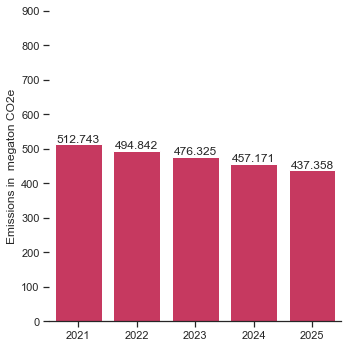

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(ax=ax, x=forecast.index[-6:-1], y= forecast.cur[-6:-1], color='#DD2255')
ax.set_ylabel('Emissions in  megaton CO2e')
ax.set_yticks([x for x in range(0,1000,100)], )
#plt.title('Forecasted Annual ghg emissions (2021-2025)', fontdict=font)
ax.bar_label(ax.containers[0])
sns.despine(left = True)
save_fig('emissions forecast')